In [95]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
df = pd.read_pickle("./cleaned_jobs.pk1")

Exploring data and updating the dataframe by cleaning and arsing new features

1. Simplify job titles
2. Add seniority based on title
3. Correct state variable
4. Add length of Job description. Might indicate patterns
5. Parse and count competitors for the data 
6. Conver hourly wage to annual wage to make it consistent

Simplify Job Titles and add seniroity

In [97]:
# Define function to parse and simplify job titles

def simple_jobs(title):
    job_array = ['data scientist','machine learning','data engineer','manager','director']
    
    simplified_job = 'na'

    for job in job_array:
        if job in title.lower():
            simplified_job =  job
    
    return simplified_job

def seniority(title):
    tmp = title.lower()
    if 'sr' in tmp or 'senior' in tmp or 'lead' in tmp or 'principal' in tmp:
        return 'senior'
    elif 'jr' in tmp or 'junior' in tmp:
        return 'junior'
    else:
        return 'na'
        

In [98]:
df['job_simplified'] = df['Job Title'].apply(simple_jobs)
df['seniority'] = df['Job Title'].apply(seniority)

In [99]:
df['job_simplified'].value_counts()
df['seniority'].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

Update the job state variable

In [100]:
df['Headquarters'].value_counts()
df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 NC              21
 WA              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 IN              10
 WI              10
 UT              10
 MO               9
 AZ               9
 AL               8
 DE               6
 KY               6
 GA               6
 MI               6
 CT               5
 IA               5
 NE               4
 OR               4
 LA               4
 KS               3
 NM               3
 ID               2
 MN               2
 RI               1
 Los Angeles      1
 SC               1
Name: job_state, dtype: int64

In [101]:
# check state variable to see counts

#df['job_state'].value_counts()

# Correct Los angeles to LA

df['job_state'] = df['job_state'].apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')

df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
UT     10
WI     10
IN     10
AZ      9
MO      9
AL      8
MI      6
DE      6
KY      6
GA      6
IA      5
CT      5
NE      4
LA      4
OR      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

Add length of job descriptions


In [102]:
df['job_desc_len'] = df['Job Description'].apply(lambda x: len(x))

df['job_desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: job_desc_len, Length: 742, dtype: int64

Parse and count competitors

In [103]:
# Check competitor column

df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

In [104]:
# Split by comma and count # of entries
# leave as -1 if not available

df['num_competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

df['num_competitors']

0      0
1      0
2      0
3      3
4      3
      ..
950    3
951    3
952    0
953    0
955    0
Name: num_competitors, Length: 742, dtype: int64

Convert hourly wages to annual

Assumption will be 40hrs/week and 52 weeks per year. SInce all salaries are in thousands, we divide by 1k to make it consistent



In [105]:
df.columns.values

df['hourly flag'].value_counts()

0    718
1     24
Name: hourly flag, dtype: int64

In [106]:
display(df.loc[df['min_salary'] < 0, ['min_salary','max_salary']])

,min_salary,max_salary


In [107]:
df['min_salary_updated'] = df.apply(lambda x: x['min_salary'] if x['hourly flag'] == 0 else x['min_salary']*(40*52/1000), axis = 1)
df['max_salary_updated'] = df.apply(lambda x: x['max_salary'] if x['hourly flag'] == 0 else x['max_salary']*(40*52/1000), axis = 1)

# Dropping old salary columns

df['avg_salary'] = df.apply(lambda x: (x['min_salary_updated']+x['max_salary_updated'])/2, axis =1)

df.drop(labels = ['min_salary','max_salary'], axis = 1, inplace = True)

In [108]:
df.columns.values

array(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly flag', 'employer provided flag',
       'company_txt', 'job_state', 'hq_state', 'job_in_HQ_flag',
       'age_company', 'sas_flag', 'spark_flag', 'python_flag',
       'matlab_flag', 'tensorflow_flag', 'tableau_flag', 'aws_flag',
       'hadoop_flag', 'r_flag', 'job_simplified', 'seniority',
       'job_desc_len', 'num_competitors', 'min_salary_updated',
       'max_salary_updated', 'avg_salary'], dtype=object)

# Understanding final data frame and creating visualizations

In [109]:
display(df.describe())

,Rating,Founded,hourly flag,employer provided flag,age_company,sas_flag,spark_flag,python_flag,matlab_flag,tensorflow_flag,tableau_flag,aws_flag,hadoop_flag,r_flag,job_desc_len,num_competitors,min_salary_updated,max_salary_updated,avg_salary
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.039084,47.524259,0.117251,0.225067,0.528302,0.074124,0.095687,0.199461,0.237197,0.167116,0.002695,3869.545822,1.053908,74.771752,128.226900,101.499326
std,0.801210,497.183763,0.177034,0.193925,53.839080,0.321936,0.417908,0.499535,0.262149,0.294360,0.399865,0.425651,0.373331,0.051882,1521.495868,1.384239,30.926958,45.110814,37.463032
min,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000,15.000000,16.000000,15.500000
25%,3.300000,1939.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000,52.000000,96.000000,73.500000
50%,3.700000,1988.000000,0.000000,0.000000,25.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3731.000000,0.000000,69.500000,124.000000,97.500000
75%,4.000000,2007.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.000000,3.000000,91.000000,155.000000,122.500000
max,5.000000,2019.000000,1.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000,202.000000,306.000000,254.000000


<AxesSubplot:>

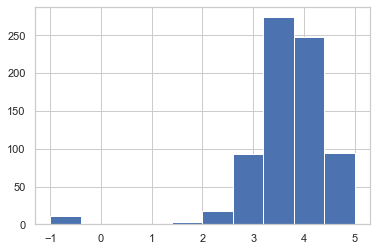

In [110]:
# Understand ratings of company

df['Rating'].hist()

# Its quite close to Normal distribution

<AxesSubplot:>

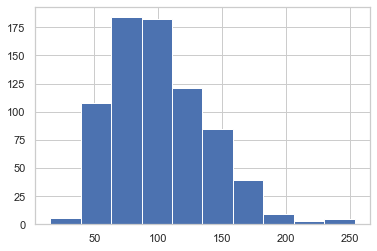

In [111]:
# Average salary histogram
df['avg_salary'].hist()

# It is right skewed and not normal distribtuion. We may need to make it normal

<AxesSubplot:>

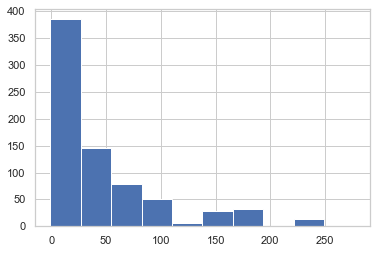

In [112]:
# Company age

df['age_company'].hist()

# As expected, most of the companies are new companies. Few old ones seem to be adopting DS positions.
# We might be able to check if older companies are willing to offer more for DS roles

<AxesSubplot:>

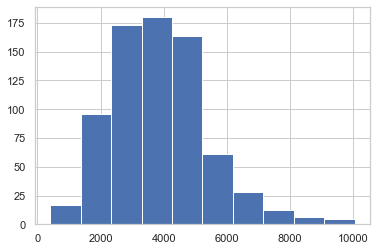

In [113]:
# Length of Job description

df['job_desc_len'].hist()

In [114]:
df.columns.values

array(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly flag', 'employer provided flag',
       'company_txt', 'job_state', 'hq_state', 'job_in_HQ_flag',
       'age_company', 'sas_flag', 'spark_flag', 'python_flag',
       'matlab_flag', 'tensorflow_flag', 'tableau_flag', 'aws_flag',
       'hadoop_flag', 'r_flag', 'job_simplified', 'seniority',
       'job_desc_len', 'num_competitors', 'min_salary_updated',
       'max_salary_updated', 'avg_salary'], dtype=object)

<AxesSubplot:>

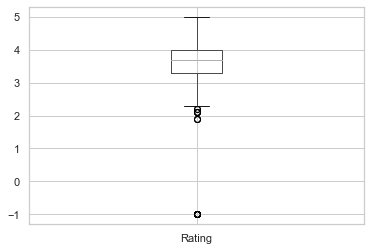

In [115]:
# Box plots for ratings and salary

df.boxplot(column = ['Rating'])

In [116]:
# Understand correlation b/w variables

df[['age_company','avg_salary','Rating','job_desc_len']].corr()

,age_company,avg_salary,Rating,job_desc_len
age_company,1.000000,0.022120,0.023162,0.164188
avg_salary,0.022120,1.000000,0.012429,0.069742
Rating,0.023162,0.012429,1.000000,-0.012281
job_desc_len,0.164188,0.069742,-0.012281,1.000000


<AxesSubplot:>

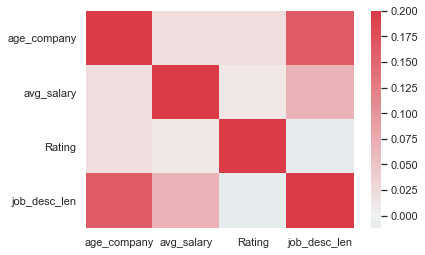

In [117]:
# Put correlation into a plot

#Make a consitent colormap as default can be confusiing

cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(df[['age_company','avg_salary','Rating','job_desc_len']].corr(),vmax = 0.2, center = 0, cmap = cmap)

# Older companies seem to put up longer and detailed descriptions
# There is slight correlation b/w salary and descrption with salary and age with rating

Bar plot for Industry: Total unique: n=60


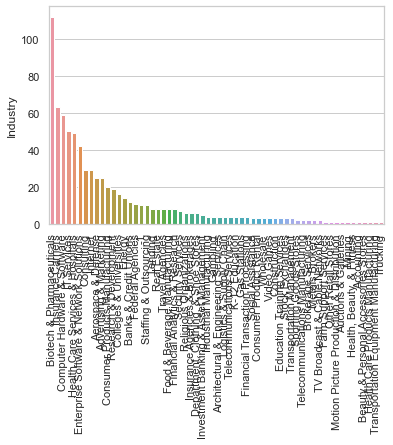

Bar plot for Sector: Total unique: n=25


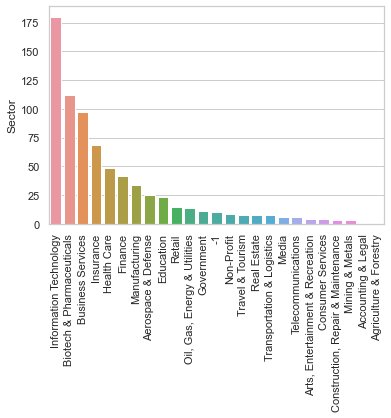

Bar plot for Location: Total unique: n=200


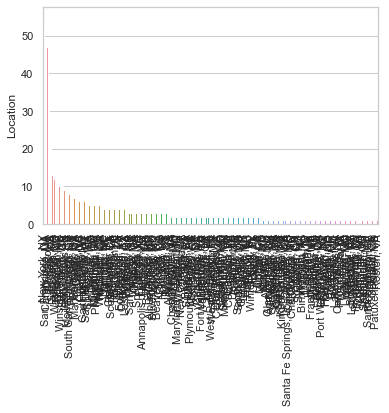

Bar plot for Headquarters: Total unique: n=198


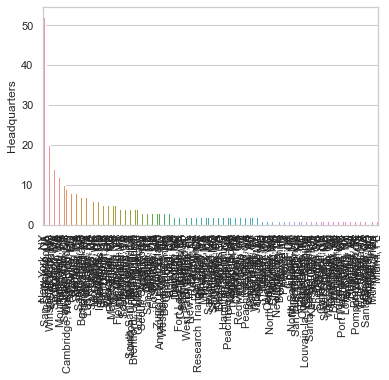

Bar plot for Revenue: Total unique: n=14


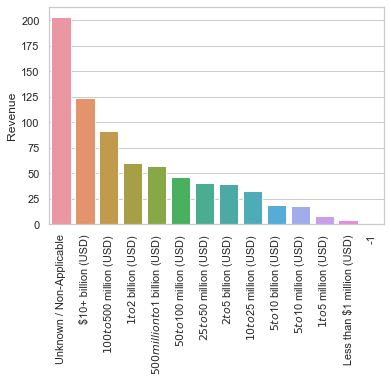

Bar plot for job_simplified: Total unique: n=6


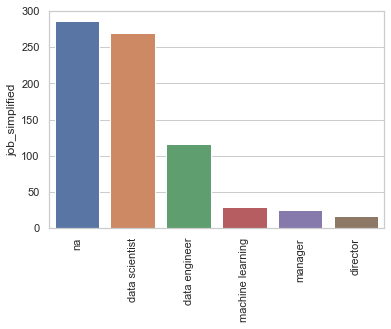

Bar plot for seniority: Total unique: n=3


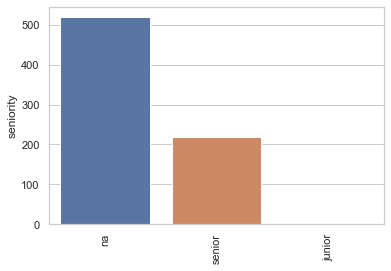

Bar plot for num_competitors: Total unique: n=5


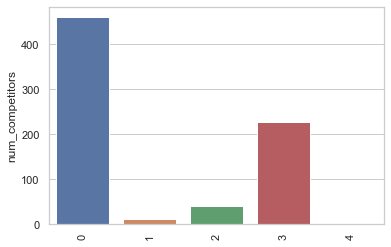

Bar plot for job_state: Total unique: n=37


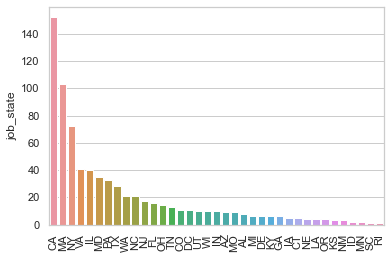

Bar plot for hq_state: Total unique: n=47


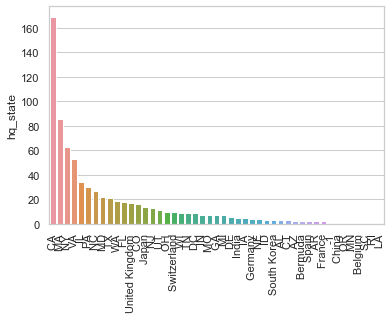

Bar plot for job_in_HQ_flag: Total unique: n=2


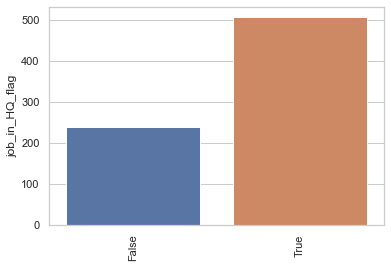

Bar plot for sas_flag: Total unique: n=2


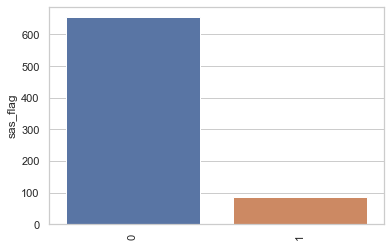

Bar plot for spark_flag: Total unique: n=2


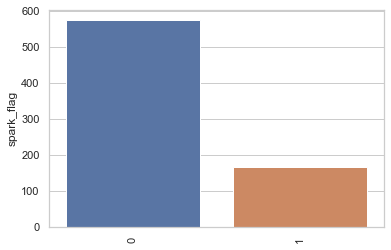

Bar plot for python_flag: Total unique: n=2


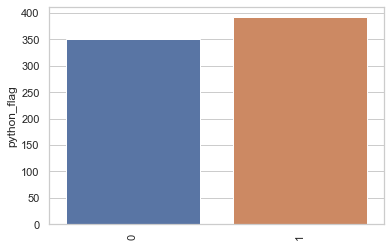

Bar plot for matlab_flag: Total unique: n=2


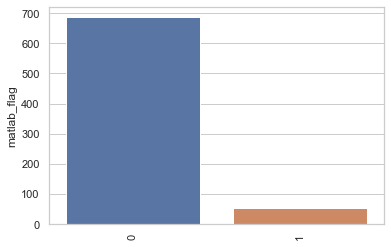

Bar plot for tensorflow_flag: Total unique: n=2


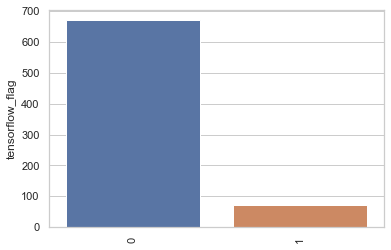

Bar plot for tableau_flag: Total unique: n=2


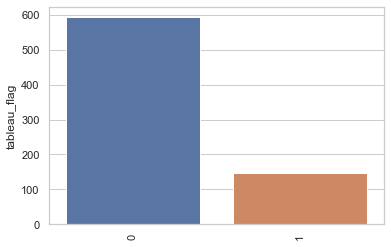

Bar plot for aws_flag: Total unique: n=2


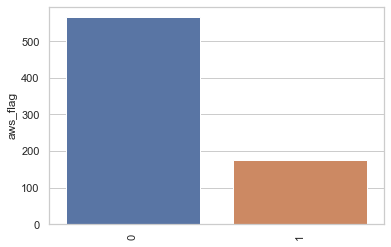

Bar plot for hadoop_flag: Total unique: n=2


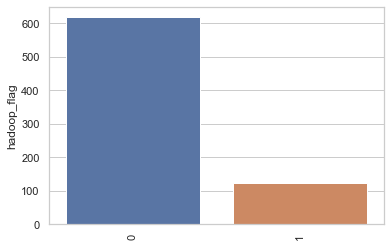

Bar plot for r_flag: Total unique: n=2


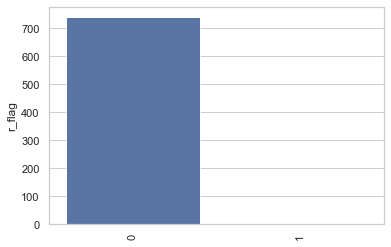

In [118]:
cat_cols = ['Industry', 'Sector', 'Location', 'Headquarters','Revenue','job_simplified','seniority','num_competitors','job_state', 'hq_state', 'job_in_HQ_flag', 'sas_flag', 'spark_flag', 'python_flag',
       'matlab_flag', 'tensorflow_flag', 'tableau_flag', 'aws_flag',
       'hadoop_flag', 'r_flag']

df_cat = df.loc[:,cat_cols]

for col in df_cat.columns:
    cat_num = df_cat[col].value_counts()
    
    print("Bar plot for %s: Total unique: n=%d" % (col, len(cat_num)))
    
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

Bar plot for Industry: Total unique: n=20


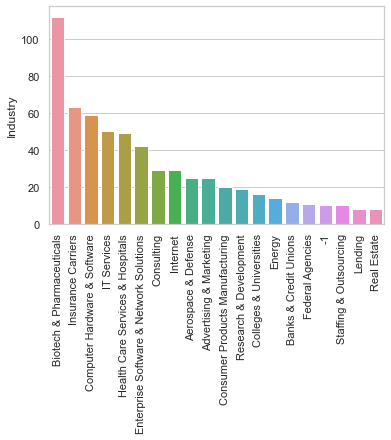

Bar plot for Sector: Total unique: n=20


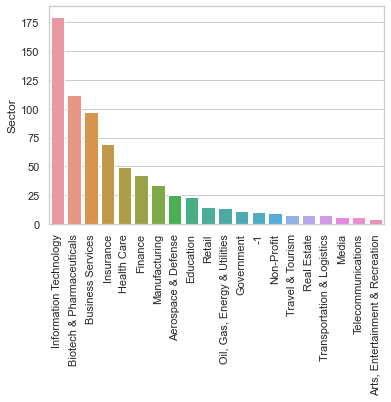

Bar plot for Location: Total unique: n=20


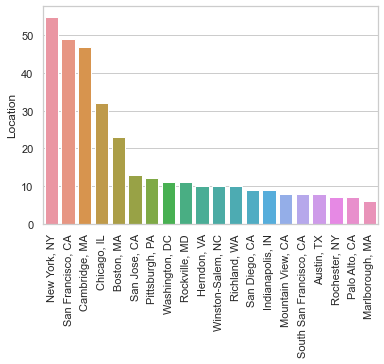

Bar plot for Headquarters: Total unique: n=20


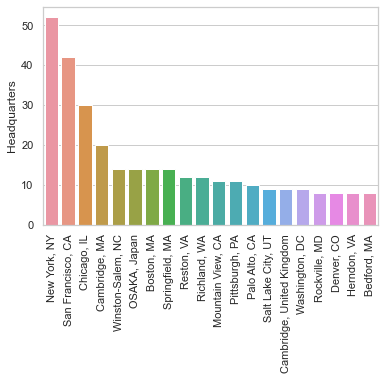

Bar plot for Revenue: Total unique: n=14


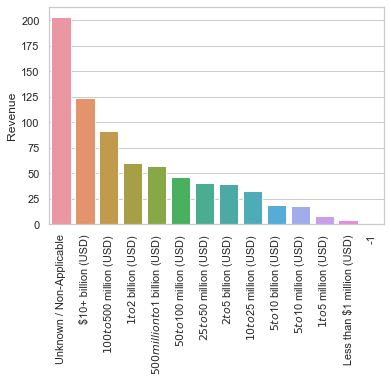

Bar plot for job_simplified: Total unique: n=6


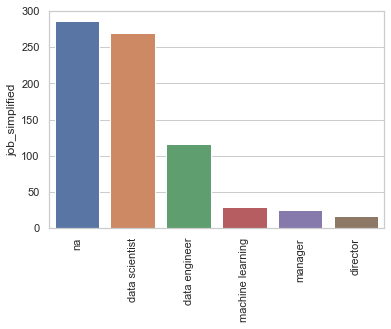

Bar plot for seniority: Total unique: n=3


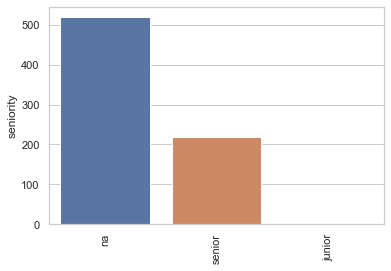

Bar plot for num_competitors: Total unique: n=5


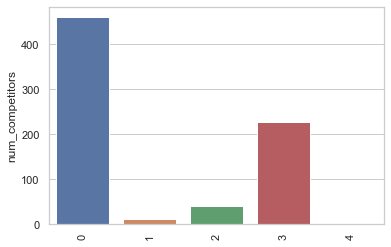

Bar plot for job_state: Total unique: n=20


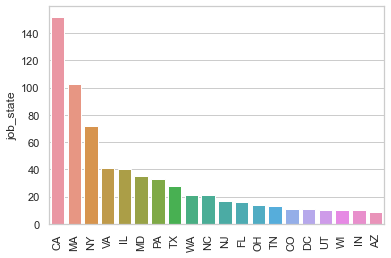

Bar plot for hq_state: Total unique: n=20


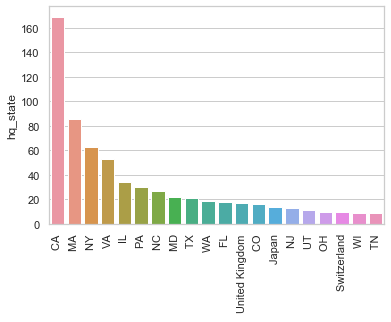

Bar plot for job_in_HQ_flag: Total unique: n=2


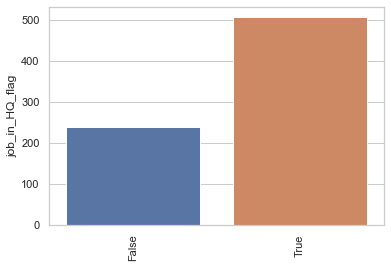

In [119]:
# Plotting the larger variables for Top 20 entries

cat_cols = ['Industry', 'Sector', 'Location', 'Headquarters','Revenue','job_simplified','seniority','num_competitors','job_state', 'hq_state', 'job_in_HQ_flag']

df_cat = df.loc[:,cat_cols]

for col in df_cat.columns:
    cat_num = df_cat[col].value_counts()[:20]
    
    print("Bar plot for %s: Total unique: n=%d" % (col, len(cat_num)))
    
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.show()

In [124]:
# Use pivots to get rough estimate of averages
pd.pivot_table(df, index = ['job_simplified','seniority'], values = 'avg_salary')


avg_salary
job_simplified   seniority            
data engineer    na          94.506329
                 senior     124.689189
data scientist   junior     106.500000
                 na         107.099448
                 senior     139.856322
director         na         166.117647
machine learning na         113.947368
                 senior     127.600000
manager          na          86.760870
                 senior     167.500000
na               junior      53.250000
                 na          72.454200
                 senior      99.775714

In [125]:
pd.pivot_table(df, index = 'Location', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
Location,
"Bellevue, WA",184.5000
"Lake Forest, IL",179.5000
"Mountain View, CA",177.1875
"Novato, CA",168.0000
"Burbank, CA",164.0000
...,...
"West Reading, PA",42.6400
"Kansas City, MO",40.5000
"Alabaster, AL",39.5000


In [126]:
pd.pivot_table(df, index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
CA,123.513158
IL,116.662500
DC,110.181818
MA,107.503107
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778
NC,98.452381


In [132]:
pd.set_option('display.max_rows', 1000)

display(pd.pivot_table(df, index = ['job_state', 'job_simplified'], values = 'avg_salary', aggfunc = 'count').sort_values(['job_state','avg_salary'], ascending = False))

avg_salary
job_state job_simplified              
WI        na                         7
          data scientist             3
WA        data scientist            17
          na                         4
VA        data scientist            17
          na                        11
          data engineer             10
          machine learning           3
UT        na                         4
          data engineer              3
          data scientist             3
TX        data scientist            11
          data engineer              8
          na                         7
          machine learning           2
TN        data engineer             10
          na                         2
          data scientist             1
SC        na                         1
RI        na                         1
PA        na                        16
          machine learning           7
          data scientist             6
          manager                    3
          data engineer              1
OR        data scientist             3
          data engineer              1
OH        data scientist             7
          na                         7
NY        data scientist            35
          na                        26
          data engineer              4
          machine learning           4
          manager                    3
NM        data scientist             3
NJ        na                         7
          data scientist             4
          data engineer              2
          director                   2
          manager                    2
NE        na                         4
NC        na                        12
          data engineer              6
          data scientist             3
MO        na                         5
          data scientist             3
          manager                    1
MN        data engineer              1
          na                         1
MI        data scientist             4
          manager                    2
MD        na                        19
          data scientist            13
          data engineer              3
MA        na                        50
          data scientist            28
          data engineer              9
          director                   9
          manager                    5
          machine learning           2
LA        data engineer              2
          na                         2
KY        na                         4
          data scientist             2
KS        machine learning           3
IN        data engineer              4
          na                         4
          data scientist             2
IL        data scientist            15
          na                         9
          data engineer              8
          director                   6
          machine learning           2
ID        na                         2
IA        data engineer              3
          na                         2
GA        data scientist             3
          na                         3
FL        data scientist             7
          na                         6
          data engineer              3
DE        na                         6
DC        data scientist             5
          data engineer              4
          na                         2
CT        na                         3
          data scientist             2
CO        na                         4
          data engineer              3
          data scientist             3
          machine learning           1
CA        data scientist            68
          na                        45
          data engineer             25
          manager                    9
          machine learning           5
AZ        data engineer              5
          na                         3
          data scientist             1
AL        na                         7
          data engineer              1

In [137]:
display(pd.pivot_table(df.loc[df['job_simplified']=='data scientist'], index = ['job_state'], values = 'avg_salary').sort_values(['avg_salary'], ascending = False))

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
MA,113.696429
NY,113.685714
WI,113.500000


In [139]:
# Understand salary by various categorical variables

cat_cols = ['Rating','Location', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'job_state', 'age_company', 'sas_flag', 'spark_flag', 'python_flag','matlab_flag', 'tensorflow_flag', 'tableau_flag', 'aws_flag','hadoop_flag', 'r_flag', 'job_simplified','avg_salary']

df_for_piv = df.loc[:,cat_cols]

In [150]:
pd.pivot_table(df_for_piv, index = 'job_state', values=['avg_salary'], aggfunc=['mean', 'count']).columns

MultiIndex([( 'mean', 'avg_salary'),
            ('count', 'avg_salary')],
           )

In [158]:
for col in df_for_piv.columns:
    if col == 'avg_salary':
        continue
    else:
        print(pd.pivot_table(df_for_piv, index = col, values=['avg_salary'], aggfunc=['mean', 'count']).sort_values([('mean', 'avg_salary')], ascending=[False]))

              mean      count
        avg_salary avg_salary
Rating                       
-1.0    136.181818         11
 5.0    134.700000          5
 2.5    120.000000          2
 4.5    117.714286          7
 4.1    116.368421         19
 3.9    113.071429         63
 2.6    109.083333         12
 4.4    108.606061         33
 4.0    107.316596         47
 3.2    107.042857         35
 3.7    105.804262         61
 3.5    104.897959         49
 3.3    104.060513         39
 4.7    103.983871         31
 4.3    102.468750         32
 4.2    100.442308         26
 2.2     97.750000          2
 3.8     97.466557         61
 4.6     97.250000         10
 2.1     95.900000          5
 3.4     93.502273         44
 3.6     90.303913         46
 1.9     87.500000          3
 3.1     86.580000         25
 3.0     85.588235         17
 2.7     85.332857         14
 2.8     83.928571          7
 2.3     81.500000          2
 2.9     81.138889         18
 4.8     80.277778          9
 2.4     6

In [ ]:
## TODO wordcloud for Job description to pick up on buzz words

In [127]:
df.columns.values


array(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue',
       'Competitors', 'hourly flag', 'employer provided flag',
       'company_txt', 'job_state', 'hq_state', 'job_in_HQ_flag',
       'age_company', 'sas_flag', 'spark_flag', 'python_flag',
       'matlab_flag', 'tensorflow_flag', 'tableau_flag', 'aws_flag',
       'hadoop_flag', 'r_flag', 'job_simplified', 'seniority',
       'job_desc_len', 'num_competitors', 'min_salary_updated',
       'max_salary_updated', 'avg_salary'], dtype=object)

In [123]:
# Plotting categorical variable histograms


Notes for variables to update:

Need to standardize
1. avg_salary
2. age_company


